**Get started**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Indian Liver Patient Records.zip')

In [ ]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
dataset.shape


(583, 11)

In [ ]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [ ]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool

In [ ]:
dataset.duplicated().sum()

13

In [ ]:
dataset = dataset.drop_duplicates()
print(dataset.shape)

(570, 11)


Checking missing values

In [ ]:
dataset.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

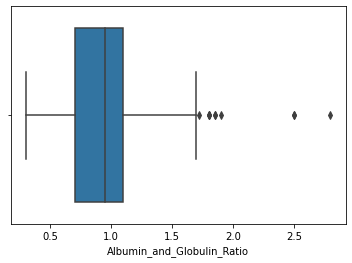

In [ ]:
sns.boxplot(data = dataset, x= 'Albumin_and_Globulin_Ratio')

In [ ]:
dataset['Albumin_and_Globulin_Ratio'].mode()

0    1.0
dtype: float64

In [ ]:
dataset['Albumin_and_Globulin_Ratio'].median()

0.95

In [ ]:
dataset['Albumin_and_Globulin_Ratio'].mean()

0.9480035335689044

In [ ]:
dataset['Albumin_and_Globulin_Ratio']=dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].median())

In [ ]:
dataset.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

**Male and Female**

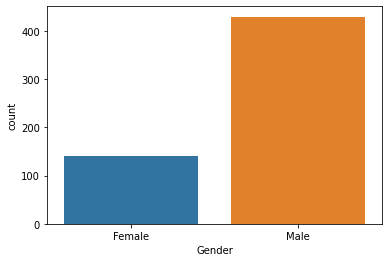

In [ ]:
import seaborn as sns
sns.countplot(data=dataset,x='Gender',label='count')

In [ ]:
Male,Female = dataset['Gender'].value_counts()
print('Number of patients that are male: ',Male)
print('Number of patients that are female: ',Female)

Number of patients that are male:  430
Number of patients that are female:  140


**Encode the gender column**
Label Male as 1 and female as 0

In [ ]:
def partition(x):
    if x=='Male':
        return 1
    return 0
dataset['Gender']=dataset['Gender'].map(partition)

In [ ]:
dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


for our convinient converting output column 'dataset' to o's and 1's-

output value has '1' for liver disease and '0' for no liver disease


In [ ]:
def partition(x):
    if x==2:
        return 0
    return 1
dataset['Dataset']=dataset['Dataset'].map(partition)

In [ ]:
dataset['Dataset']

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 570, dtype: int64

Correlation Matrix

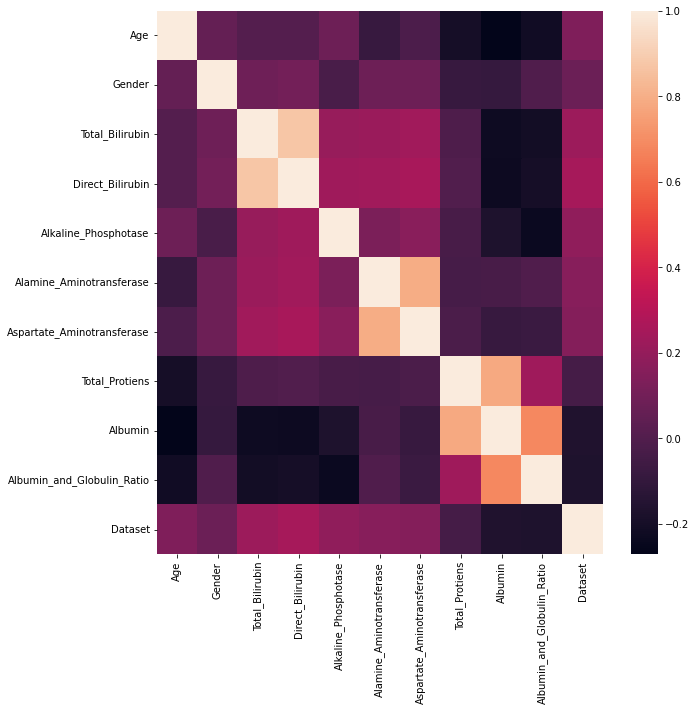

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr())

Data Preparation

In [ ]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
#spliting data into tringdata and test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25,random_state =42)

In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

**Machine Learning models**

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 0)
log_classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
#predicting the output
log_y_pred = log_classifier.predict(x_test)

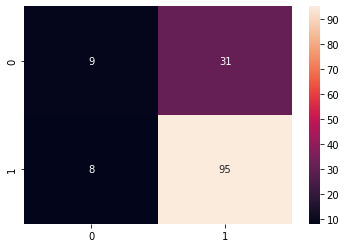

In [ ]:
from sklearn.metrics import confusion_matrix
log_cm = confusion_matrix(y_test,log_y_pred)
sns.heatmap(log_cm,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score,  precision_score
print(accuracy_score(y_test,log_y_pred))
print(precision_score(y_test,log_y_pred))


0.7272727272727273
0.753968253968254


**K Nearest Neighbors Algorithm**

In [ ]:
x_train.shape

(427, 10)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=21,metric = 'minkowski')
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [ ]:
knn_y_pred = knn_classifier.predict(x_test)

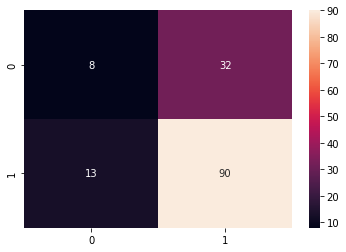

In [ ]:
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test,knn_y_pred)
sns.heatmap(knn_cm, annot=True)

In [ ]:
from sklearn.metrics import accuracy_score,  precision_score
print(accuracy_score(y_test,knn_y_pred))
print(precision_score(y_test,knn_y_pred))

0.6853146853146853
0.7377049180327869


SVM support vector model

In [ ]:
from sklearn.svm import SVC
svm_classifier=SVC(kernel = 'rbf', random_state=0)
svm_classifier.fit(x_train,y_train)

SVC(random_state=0)

In [ ]:
svm_y_pred=svm_classifier.predict(x_test)

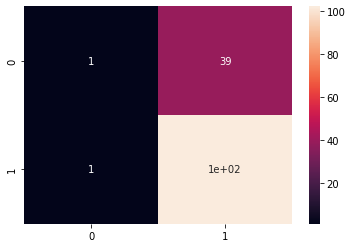

In [ ]:
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test,svm_y_pred)
sns.heatmap(svm_cm, annot=True)

In [ ]:
from sklearn.metrics import accuracy_score,  precision_score
print(accuracy_score(y_test,svm_y_pred))
print(precision_score(y_test,svm_y_pred))

0.7202797202797203
0.723404255319149


**Artificial Neural Network**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
#Initialising the ANN
classifier = Sequential()
#adding the input layer and 1st hidden layer
classifier.add(Dense(units = 400, activation ='relu', input_dim=10))
classifier.add(Dropout(rate=0.1))
#adding second hidden layer
classifier.add(Dense(units = 400, activation ='relu'))
classifier.add(Dropout(rate=0.1))
#output layer
classifier.add(Dense(units = 1, activation ='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [ ]:
classifier.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 7ms/step - loss: 0.5819 - accuracy: 0.7049
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 0.5191 - accuracy: 0.7073
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5017 - accuracy: 0.7237
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4987 - accuracy: 0.7143
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4930 - accuracy: 0.7354
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4849 - accuracy: 0.7541
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4731 - accuracy: 0.7588
Epoch 8/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4653 - accuracy: 0.7541
Epoch 9/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4614 - accuracy: 0.7447
Epoch 10/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4598 - accuracy: 0.7588
Epoch 11/

In [ ]:
ann_y_pred = classifier.predict(x_test)

In [ ]:
ann_y_pred[0]

array([0.91957307], dtype=float32)

In [ ]:
ann_y_pred = ann_y_pred >=0.5

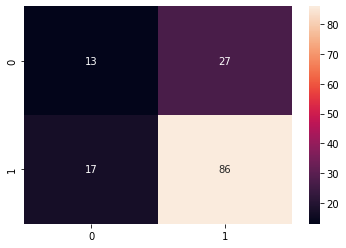

In [ ]:
from sklearn.metrics import confusion_matrix
ann_cm = confusion_matrix(y_test,ann_y_pred)
sns.heatmap(ann_cm, annot=True)

In [ ]:
from sklearn.metrics import accuracy_score,  precision_score
print(accuracy_score(y_test,ann_y_pred))
print(precision_score(y_test,ann_y_pred))

0.6923076923076923
0.7610619469026548


Saving the models

In [ ]:
import pickle
pickle.dump(knn_classifier,open('model.pkl','wb'))
pickle.dump(sc, open('sc.pkl','wb'))